In [1]:
#과일 데이터 불러오기
import numpy as np

fruits = np.load('fruits_300.npy')
fruits.shape

(300, 100, 100)

In [2]:
fruits_2d = fruits.reshape(-1, 100 * 100) #너비 100, 높이 100 1차원 배열 10000개 반환

In [3]:
# KMeans 클래스 불러오고, 학습
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42) # n_clusters : 군집의 갯수
km.fit(fruits_2d)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [4]:
#군집 분포
km.labels_

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [5]:
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([112,  98,  90]))

In [10]:
# 10행 10열로 과일 이미지를 출력하는 함수
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio = 1): #arr : 과일 이미지 데이터 배열, ratio : 확대 비율
    # 총 샘플의 갯수
    total = len(arr)
    # 총 행수
    rows = int(np.ceil(total / 10))
    # 한 행당 열의 갯수
    cols = total if rows < 2 else 10 # 1행일때는 전체 갯수, 그 이상일때는 10개로 갯수 고정

    _, axs = plt.subplots(rows, cols, figsize=(cols * ratio, rows * ratio))

    for i in range(rows):
        for j in range(cols):
            cur = i *10 + j
            if  cur < total:
                axs[i, j].imshow(arr[cur], cmap='gray_r')
    plt.show()



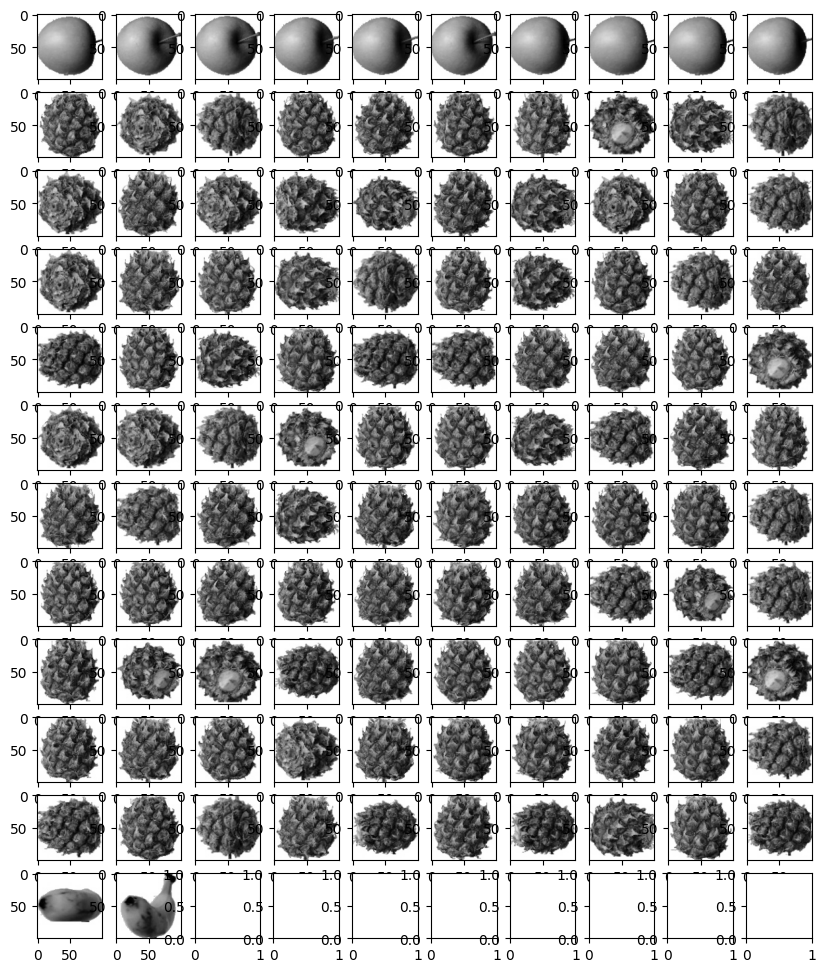

In [11]:
draw_fruits(fruits[km.labels_ == 0])

In [12]:
# 클러스터의 중심점을 찾기 위한 반복 횟수
km.n_iter_

4

In [13]:
# 클러스터의 중심, 군집의 평균치 
km.cluster_centers_

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.10204082, 1.07142857, 1.10204082, ..., 1.        , 1.        ,
        1.        ],
       [1.01111111, 1.01111111, 1.01111111, ..., 1.        , 1.        ,
        1.        ]], shape=(3, 10000))

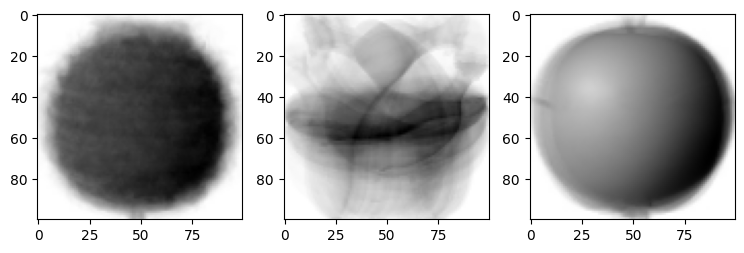

In [17]:
_, axs = plt.subplots(1, 3, figsize=(9, 3))
axs[0].imshow(km.cluster_centers_.reshape(-1, 100, 100)[0], cmap='gray_r')
axs[1].imshow(km.cluster_centers_.reshape(-1, 100, 100)[1], cmap='gray_r')
axs[2].imshow(km.cluster_centers_.reshape(-1, 100, 100)[2], cmap='gray_r')

plt.show()

In [18]:
#km.transform(..) : 클러스터 중심(센트로이드)에서 얼마나 떨어져 있는지 계산
km.transform(fruits_2d[100:101]) # 2차원 배열로만 사용 가능하므로 [100]이 아니라 [100:101]

array([[3400.24197319, 8837.37750892, 5279.33763699]])

In [20]:
km.predict(fruits_2d[100:101])

array([0], dtype=int32)

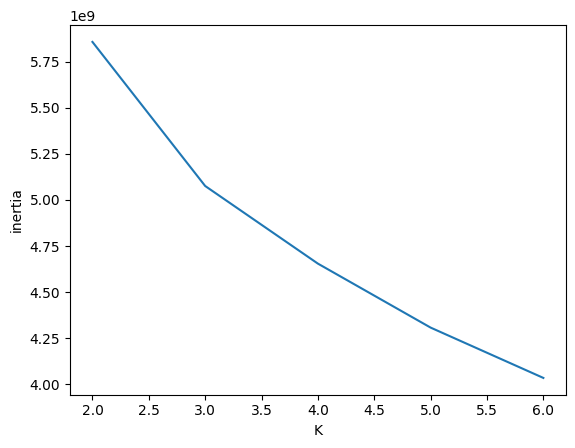

In [22]:
# 클러스터의 갯수를 결정하는 방법 : inertai 값을 가지고 꺽이는 지점을 찾는다.
inertia = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)

plt.plot(range(2,7), inertia)
plt.xlabel("K")
plt.ylabel("inertia")
plt.show()